In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.cluster.hierarchy as hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sns.set_style('dark')
sns.palettes

<module 'seaborn.palettes' from 'C:\\Users\\Zinia Gaba\\anaconda3\\lib\\site-packages\\seaborn\\palettes.py'>

## Hierarchial Clustering

In [198]:
df=pd.read_csv('State_wise_Health_income-1.csv')
df

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
...,...,...,...,...,...,...
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403


In [231]:
df_org=pd.read_csv('State_wise_Health_income-1.csv')

In [200]:
df.drop('States', axis=1, inplace= True)

In [201]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [202]:
df

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,417,66,564,1823
1,1485,646,2710,73662
2,654,299,1104,27318
3,192,25,573,250
4,43,8,528,22
...,...,...,...,...
292,3443,970,2499,238636
293,2963,793,1257,162831
294,3276,609,1522,120184
295,3463,847,934,199403


In [203]:
df.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,297.000000,297.000000,297.000000,297.000000
mean,2630.151515,693.632997,2156.915825,174601.117845
std,2038.505431,468.944354,1491.854058,167167.992863
min,-10.000000,0.000000,500.000000,22.000000
25%,641.000000,175.000000,751.000000,8721.000000
50%,2451.000000,810.000000,1865.000000,137173.000000
75%,4094.000000,1073.000000,3137.000000,313092.000000
max,10219.000000,1508.000000,7049.000000,728575.000000


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indeces1    297 non-null    int64
 1   Health_indices2    297 non-null    int64
 2   Per_capita_income  297 non-null    int64
 3   GDP                297 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB


In [206]:
df.isnull().sum()

Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [207]:
df.shape

(297, 4)

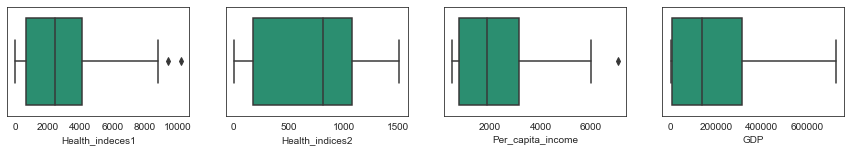

In [208]:
plt.figure(figsize = (15,2))
sns.set_style('white')
plt.subplot(141)
sns.boxplot(df['Health_indeces1'])
plt.subplot(142)
sns.boxplot(df['Health_indices2'])
plt.subplot(143)
sns.boxplot(df['Per_capita_income'])
plt.subplot(144)
sns.boxplot(df['GDP'])

In [209]:
Q3H1= np.percentile(df['Health_indeces1'], 75)
Q1H1= np.percentile(df['Health_indeces1'], 25)
IQRH1 = np.percentile(df['Health_indeces1'], 75)-np.percentile(df['Health_indeces1'], 25)

In [210]:
Q3I = np.percentile(df['Per_capita_income'], 75)
Q1I = np.percentile(df['Per_capita_income'], 25)
IQRI = np.percentile(df['Per_capita_income'], 75) - np.percentile(df['Per_capita_income'], 25)

In [211]:
df.loc [ df['Health_indeces1'] > 1.5*IQRH1 + Q3H1 , 'Health_indeces1'] = df['Health_indeces1'].median()

In [212]:
df.loc [ df['Per_capita_income'] > 1.5*IQRI + Q3I , 'Per_capita_income'] = df['Per_capita_income'].median()

In [213]:
df=pd.DataFrame(stats.zscore(df) ,columns = ('Health_indeces1' , 'Health_indices2' ,'Per_capita_income' , 'GDP'))

In [214]:
df.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02
mean,2.130731e-16,1.252272e-17,2.306423e-16,8.032295e-17
std,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00
min,-1.330536e+00,-1.481634e+00,-1.121358e+00,-1.046096e+00
25%,-9.961798e-01,-1.107825e+00,-9.496794e-01,-9.939707e-01
50%,-6.655748e-02,2.485655e-01,-1.877260e-01,-2.242731e-01
75%,7.475040e-01,8.103462e-01,6.672487e-01,8.298516e-01
max,3.195338e+00,1.739527e+00,2.642582e+00,3.319468e+00


In [215]:
df.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02
mean,2.130731e-16,1.252272e-17,2.306423e-16,8.032295e-17
std,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00
min,-1.330536e+00,-1.481634e+00,-1.121358e+00,-1.046096e+00
25%,-9.961798e-01,-1.107825e+00,-9.496794e-01,-9.939707e-01
50%,-6.655748e-02,2.485655e-01,-1.877260e-01,-2.242731e-01
75%,7.475040e-01,8.103462e-01,6.672487e-01,8.298516e-01
max,3.195338e+00,1.739527e+00,2.642582e+00,3.319468e+00


In [216]:
sns.set_palette('Dark2')

In [217]:
data= linkage(df, 'ward')

In [218]:
data=pd.DataFrame(data , columns = ('Ind 1', 'Ind 2' , 'Distance' , '#Obscluster'))

In [220]:
data.head(5)

,Ind 1,Ind 2,Distance,#Obscluster
0,5.0,57.0,0.000000,2.0
1,184.0,230.0,0.000006,2.0
2,247.0,256.0,0.002136,2.0
3,116.0,131.0,0.003595,2.0
4,65.0,297.0,0.004151,3.0


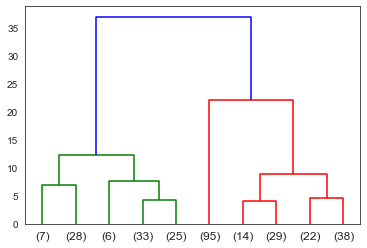

In [221]:
dend_data=dendrogram(data,10,'lastp')

In [222]:
clusters=fcluster(data,15,'distance' )

In [226]:
clusters=pd.DataFrame(clusters)
clusters[0].value_counts()

3    103
1     99
2     95
Name: 0, dtype: int64

In [232]:
df_org['clusters']= clusters

In [234]:
df_org

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,clusters
0,0,Bachevo,417,66,564,1823,2
1,1,Balgarchevo,1485,646,2710,73662,3
2,2,Belasitsa,654,299,1104,27318,2
3,3,Belo_Pole,192,25,573,250,2
4,4,Beslen,43,8,528,22,2
...,...,...,...,...,...,...,...
292,292,Greencastle,3443,970,2499,238636,3
293,293,Greenisland,2963,793,1257,162831,3
294,294,Greyabbey,3276,609,1522,120184,3
295,295,Greysteel,3463,847,934,199403,3


In [236]:
df_org.to_csv('Heirarchial_Cluster.csv')

## K means clustering

In [237]:
df=pd.read_csv('State_wise_Health_income-1.csv')

In [238]:
df

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
...,...,...,...,...,...,...
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403


In [239]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [240]:
df

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22
...,...,...,...,...,...
292,Greencastle,3443,970,2499,238636
293,Greenisland,2963,793,1257,162831
294,Greyabbey,3276,609,1522,120184
295,Greysteel,3463,847,934,199403


In [241]:
df

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22
...,...,...,...,...,...
292,Greencastle,3443,970,2499,238636
293,Greenisland,2963,793,1257,162831
294,Greyabbey,3276,609,1522,120184
295,Greysteel,3463,847,934,199403


In [242]:
df.drop('States', axis= 1, inplace= True)

In [243]:
df_d=stats.zscore(df)
df_d

array([[-1.08750595, -1.34065436, -1.06954449, -1.03530421],
       [-0.56270846, -0.10174638,  0.37136183, -0.60483755],
       [-0.97104808, -0.84295512, -0.70696788, -0.88253555],
       ...,
       [ 0.31735924, -0.18078016, -0.42630672, -0.32607295],
       [ 0.40924793,  0.32759932, -0.82111237,  0.14861542],
       [-0.27524917,  0.30837488,  0.68626633, -0.04694284]])

In [244]:
data3=KMeans(3)

In [245]:
data4 = KMeans(4)


In [246]:
data4.fit(df_d)

KMeans(n_clusters=4)

In [247]:
data3=KMeans(3).fit(df_d)

In [248]:
data3

KMeans(n_clusters=3)

In [249]:
data3.labels_

array([0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [250]:
k3=data3.inertia_

In [251]:
data2= KMeans(2).fit(df_d)

In [252]:
k2= data2.inertia_

In [253]:
k4data= KMeans(4).fit(df_d)

In [254]:
k4= k4data.inertia_

In [255]:
k5data=KMeans(5).fit(df_d)

In [256]:
k5=k5data.inertia_

In [257]:
np.arange(3,10)

array([3, 4, 5, 6, 7, 8, 9])

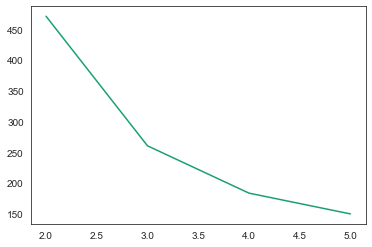

In [258]:
sns.lineplot(np.arange(2,6),list)

In [259]:
list= (k2,k3,k4,k5)

In [260]:
list

(471.35934639899426, 260.5729408376231, 183.60983976801245, 149.787873629525)

In [261]:
kclus5=k5data.labels_

In [272]:
kclus4=data4.labels_

In [273]:
silhouette_score(df_d,kclus3)

0.5335432108748761

In [274]:
kclus3= data3.labels_

In [275]:
df['KClusters']= kclus3

In [276]:
df

,Health_indeces1,Health_indices2,Per_capita_income,GDP,KClusters
0,417,66,564,1823,0
1,1485,646,2710,73662,2
2,654,299,1104,27318,0
3,192,25,573,250,0
4,43,8,528,22,0
...,...,...,...,...,...
292,3443,970,2499,238636,2
293,2963,793,1257,162831,2
294,3276,609,1522,120184,2
295,3463,847,934,199403,2


In [277]:
df.to_csv('K_cluster_f.csv')